In [34]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pylab import *

import numpy as np
import pyemma
import pytraj as pt
import mdtraj as md

import pickle
import seaborn as sns
from itertools import product
from pandas import DataFrame

from pyemma.util.contexts import settings
from glob import glob

## Loading data

In [2]:
rf0=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

rf1=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot1.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7')

rf2=pt.load('../1-Trajectories/0-Parm_rst//closed6_dry_rot2.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7')

rf3=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot3.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7')

rf4=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot4.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7')

rf5=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot5.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('../1-Trajectories/0-Parm_rst/open10_dry.rst7',
               '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

### MSM & PCCA without IPA

In [3]:
with open('./pickled/2-Without_IPA/1_Y.pickle', 'rb') as inf:
    Y = pickle.load(inf)
Y_concat= np.concatenate(Y)

with open('./pickled/2-Without_IPA/1_cluster.pickle', 'rb') as inf:
    cluster = pickle.load(inf)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

with open('./pickled/2-Without_IPA/1_msm.pickle', 'rb') as inf:
    msm = pickle.load(inf)
    
nstates=6
msm.pcca(nstates)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

### MSM & PCCA with IPA

In [4]:
with open('./pickled/1-With_IPA/1_Y.pickle', 'rb') as inf:
    Y_ipa = pickle.load(inf)
Y_concat_ipa= np.concatenate(Y_ipa)

with open('./pickled/1-With_IPA/1_cluster.pickle', 'rb') as inf:
    cluster_ipa = pickle.load(inf)
dtrajs_concatenated_ipa = np.concatenate(cluster_ipa.dtrajs)

with open('./pickled/1-With_IPA/1_msm.pickle', 'rb') as inf:
    msm_ipa = pickle.load(inf)
    
nstates_ipa=5
msm_ipa.pcca(nstates_ipa)
metastable_traj_ipa = msm_ipa.metastable_assignments[dtrajs_concatenated_ipa]

## Plots

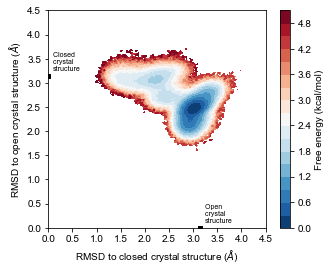

In [7]:
fig, ax = plt.subplots(figsize=(5,4))
pyemma.plots.plot_free_energy(*Y_concat[:, :2].T,
                              nbins=100, ax=ax,
                              kT=0.5825, weights=np.concatenate(msm.trajectory_weights()),
                              cbar=True,cmap="RdBu_r",ncontours=19,
                              cbar_label="Free energy (kcal/mol)")

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="s")

ax.set_aspect('equal')
ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_aspect('equal')

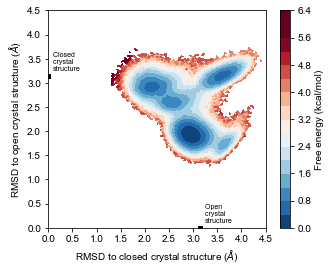

In [40]:
fig, ax = plt.subplots(figsize=(5,4))



pyemma.plots.plot_free_energy(*Y_concat_ipa[:, :2].T,
                              nbins=100, ax=ax,
                              kT=0.5825, weights=np.concatenate(msm_ipa.trajectory_weights()),
                              cbar=True,cmap="RdBu_r",ncontours=19, vmax=5.6,
                              cbar_label="Free energy (kcal/mol)")

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="s")


ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_aspect('equal')

In [31]:
diverging_colors = sns.color_palette("RdBu_r", 19)
# sns_cmap_ipa = ListedColormap(diverging_colors[0:18])
# sns_cmap = ListedColormap(diverging_colors[0:12])

sns_cmap_ipa = mpl.colors.LinearSegmentedColormap.from_list("", diverging_colors[0:18])
sns_cmap = mpl.colors.LinearSegmentedColormap.from_list("", diverging_colors[0:12])

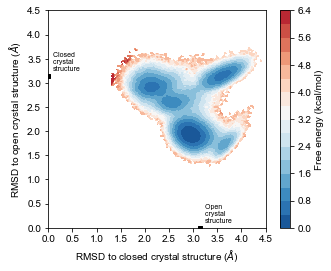

In [32]:
fig, ax = plt.subplots(figsize=(5,4))



pyemma.plots.plot_free_energy(*Y_concat_ipa[:, :2].T,
                              nbins=100, ax=ax,
                              kT=0.5825, weights=np.concatenate(msm_ipa.trajectory_weights()),
                              cbar=True,cmap=sns_cmap_ipa,ncontours=19,
#                               vmax=6.0,
                              cbar_label="Free energy (kcal/mol)")

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="s")


ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_aspect('equal')

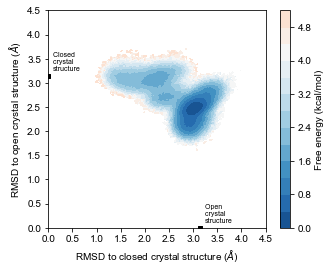

In [33]:
fig, ax = plt.subplots(figsize=(5,4))
pyemma.plots.plot_free_energy(*Y_concat[:, :2].T,
                              nbins=100, ax=ax,
                              kT=0.5825, weights=np.concatenate(msm.trajectory_weights()),
                              cbar=True,cmap=sns_cmap,ncontours=12,
                              cbar_label="Free energy (kcal/mol)")

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="s")

ax.set_aspect('equal')
ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_aspect('equal')

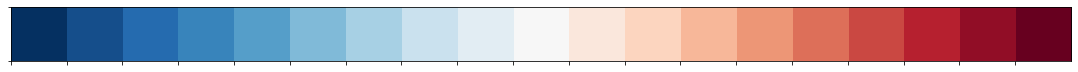

In [37]:
hexlist=[]

cmap = cm.get_cmap("RdBu_r", 19)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    hexlist.append(matplotlib.colors.rgb2hex(rgb))
sns.set_palette(hexlist[0:19])
sns.palplot(sns.color_palette())
# my_cmap_ipa=ListedColormap([hexlist[6],hexlist[3],hexlist[2],hexlist[4],hexlist[5]])
my_cmap_ipa=hexlist[0:19]

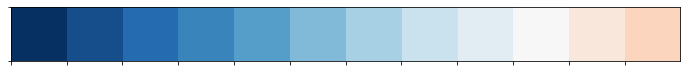

In [38]:
sns.set_palette(hexlist[0:12])
sns.palplot(sns.color_palette())
# my_cmap_ipa=ListedColormap([hexlist[6],hexlist[3],hexlist[2],hexlist[4],hexlist[5]])
my_cmap=hexlist[0:12]

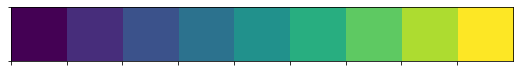

In [11]:
from pylab import *

hexlist=[]

cmap = cm.get_cmap("viridis", 9)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    hexlist.append(matplotlib.colors.rgb2hex(rgb))
sns.set_palette(hexlist)
sns.palplot(sns.color_palette())
my_cmap=ListedColormap([hexlist[1],hexlist[3],hexlist[4],hexlist[7],hexlist[8],hexlist[6]])
my_cmap_ipa=ListedColormap([hexlist[0],hexlist[5],hexlist[2],hexlist[7],hexlist[8]])

In [27]:
cmap = cm.get_cmap("viridis", 9)    # PiYG

for i in range(cmap.N):
    print(cmap(i)[:3])

(0.267004, 0.004874, 0.329415)
(0.278826, 0.17549, 0.483397)
(0.229739, 0.322361, 0.545706)
(0.172719, 0.448791, 0.557885)
(0.127568, 0.566949, 0.550556)
(0.157851, 0.683765, 0.501686)
(0.369214, 0.788888, 0.382914)
(0.678489, 0.863742, 0.189503)
(0.993248, 0.906157, 0.143936)


In [ ]:
['#8e0152','#c51b7d','#de77ae','#f1b6da','#fde0ef','#f7f7f7','#e6f5d0','#b8e186','#7fbc41','#4d9221','#276419']
['#40004b','#762a83','#9970ab','#c2a5cf','#e7d4e8','#f7f7f7','#d9f0d3','#a6dba0','#5aae61','#1b7837','#00441b']
['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061']
['#a50026','#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4','#313695']
['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#ffffbf','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
['#a50026','#d73027','#f46d43','#fdae61','#fee08b','#ffffbf','#d9ef8b','#a6d96a','#66bd63','#1a9850','#006837']

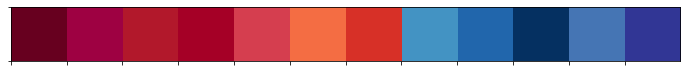

In [6]:
hexlist=['#67001f',
'#9e0142',
'#b2182b',
'#a50026',
'#d53e4f',
'#f46d43',
'#d73027',
'#4393c3',
'#2166ac',
'#053061',
'#4575b4',
'#313695']
sns.set_palette(hexlist)
sns.palplot(sns.color_palette())

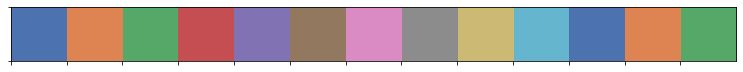

In [77]:
sns.color_palette("deep", 13)
hexlist.append(matplotlib.colors.rgb2hex(sns.color_palette("deep", 13)))

my_cmap=ListedColormap([hexlist[1],hexlist[3],hexlist[4],hexlist[7],hexlist[8],hexlist[6]])


In [83]:
 for i in sns.color_palette("deep", 10):
    print(matplotlib.colors.rgb2hex(i))

#4c72b0
#dd8452
#55a868
#c44e52
#8172b3
#937860
#da8bc3
#8c8c8c
#ccb974
#64b5cd


In [84]:
my_cmap=ListedColormap(['#4c72b0',
'#dd8452',
'#55a868',
'#c44e52',
'#8172b3',
'#64b5cd'])

In [85]:
 for i in sns.color_palette("deep", 5):
    print(matplotlib.colors.rgb2hex(i))

#4c72b0
#dd8452
#55a868
#c44e52
#8172b3


In [86]:
my_cmap_ipa=ListedColormap(['#4c72b0',
'#dd8452',
'#55a868',
'#c44e52',
'#8172b3'])

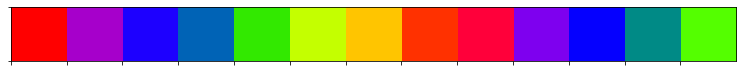

In [43]:
from pylab import *

hexlist=[]

cmap = cm.get_cmap("prism", 13)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    hexlist.append(matplotlib.colors.rgb2hex(rgb))
sns.set_palette(hexlist)
sns.palplot(sns.color_palette())

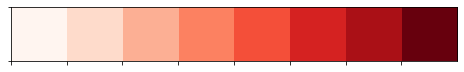

In [43]:
hexlist=[]

cmap = cm.get_cmap("Reds", 8)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    hexlist.append(matplotlib.colors.rgb2hex(rgb))
sns.set_palette(hexlist)
sns.palplot(sns.color_palette())
my_cmap_ipa=ListedColormap([hexlist[6],hexlist[3],hexlist[2],hexlist[4],hexlist[5]])

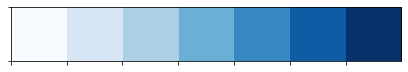

In [46]:
hexlist=[]

cmap = cm.get_cmap("Blues",7)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    hexlist.append(matplotlib.colors.rgb2hex(rgb))
sns.set_palette(hexlist)
sns.palplot(sns.color_palette())
my_cmap=ListedColormap([hexlist[2],hexlist[1],hexlist[3],hexlist[4],hexlist[6],hexlist[5]])

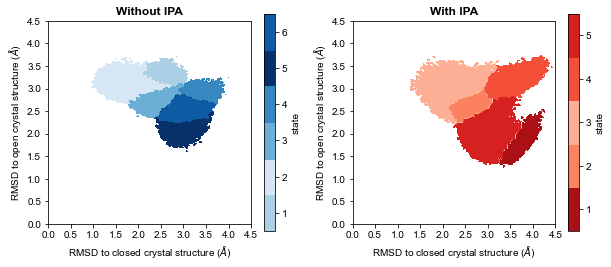

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=False)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat[:, :2].T, metastable_traj, ax=axes[0], zorder=-1, nbins=100, cmap=my_cmap)

misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates


_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat_ipa[:, :2].T, metastable_traj_ipa, ax=axes[1], zorder=-1, nbins=100, cmap=my_cmap_ipa)

misc['cbar'].set_ticklabels(range(1, nstates_ipa + 1))

axes[0].set_title('Without IPA', fontweight='bold')
axes[1].set_title('With IPA', fontweight='bold')

axes[0].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[0].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[0].set_xticks(np.arange(0, 5, 0.5))
axes[0].set_yticks(np.arange(0, 5, 0.5))

axes[1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[1].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[1].set_xticks(np.arange(0, 5, 0.5))
axes[1].set_yticks(np.arange(0, 5, 0.5))


axes[0].set_aspect('equal')
axes[1].set_aspect('equal')


# fig.savefig('./plots/2-Without_IPA/12_metastable_states.png', dpi=600)

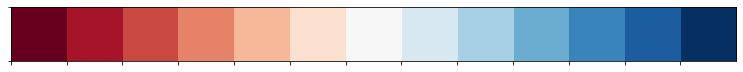

In [41]:
from pylab import *

hexlist=[]

cmap = cm.get_cmap("RdBu", 13)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    hexlist.append(matplotlib.colors.rgb2hex(rgb))
sns.set_palette(hexlist)
sns.palplot(sns.color_palette())
my_cmap=ListedColormap([hexlist[8],hexlist[7],hexlist[9],hexlist[10],hexlist[12],hexlist[11]])
my_cmap_ipa=ListedColormap([hexlist[0],hexlist[3],hexlist[4],hexlist[2],hexlist[1]])

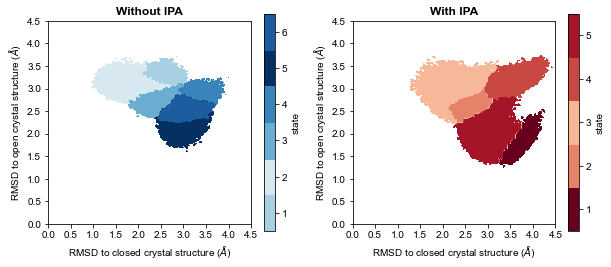

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=False)

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat[:, :2].T, metastable_traj, ax=axes[0], zorder=-1, nbins=100, cmap=my_cmap)

misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates


_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat_ipa[:, :2].T, metastable_traj_ipa, ax=axes[1], zorder=-1, nbins=100, cmap=my_cmap_ipa)

misc['cbar'].set_ticklabels(range(1, nstates_ipa + 1))

axes[0].set_title('Without IPA', fontweight='bold')
axes[1].set_title('With IPA', fontweight='bold')

axes[0].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[0].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[0].set_xticks(np.arange(0, 5, 0.5))
axes[0].set_yticks(np.arange(0, 5, 0.5))

axes[1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[1].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[1].set_xticks(np.arange(0, 5, 0.5))
axes[1].set_yticks(np.arange(0, 5, 0.5))


axes[0].set_aspect('equal')
axes[1].set_aspect('equal')


In [ ]:
def plot_labels(ax=None):
    for i in range(0,len(rmsd_open_sample)):
        plt.text(rmsd_closed_sample[i]+0.02, rmsd_open_sample[i]+0.02, 
                 i, fontsize=12, color='white')

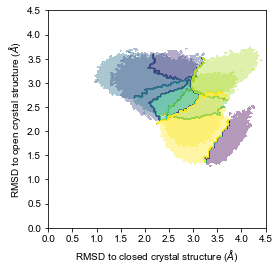

In [20]:
fig, ax = plt.subplots(figsize=(5, 4))

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat[:, :2].T, metastable_traj, ax=ax, zorder=-1, nbins=100, alpha=0.4, cmap=my_cmap, cbar=False)

# misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat_ipa[:, :2].T, metastable_traj_ipa, ax=ax, zorder=-1, nbins=100, alpha=0.4, cmap=my_cmap_ipa, cbar=False)

# misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates
# misc['cbar'].set_ticklabels(range(1, nstates_ipa + 1))

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))
ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_aspect('equal')

# fig.savefig('./plots/2-Without_IPA/12_metastable_states.png', dpi=600)

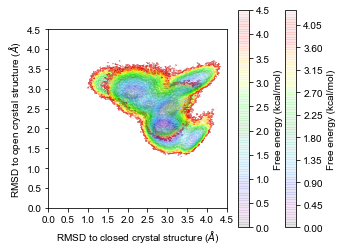

In [19]:
diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = mpl.colors.LinearSegmentedColormap.from_list("", diverging_colors[0:18])

fig, ax = plt.subplots(figsize=(5, 4))

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, ax=ax,
    nbins=100, #cmap=sns_cmap, levels=18,
    kT=0.5825, legacy=False, alpha=0.1,
    cbar_label="Free energy (kcal/mol)"
)

pyemma.plots.plot_free_energy(
    *Y_concat_ipa[:, :2].T, ax=ax,
    nbins=100, #cmap=sns_cmap, levels=18,
    kT=0.5825, legacy=False, alpha=0.1,
    cbar_label="Free energy (kcal/mol)"
)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))
ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_aspect('equal')

In [231]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 5)

In [258]:
len(pcca_samples[0])

5

In [1]:
traj_source = pyemma.coordinates.source(traj_list, top=topfile, stride=1)
pyemma.coordinates.save_trajs(
    traj_source,
    pcca_samples,
    outfiles=['./sample_structures/1-With_IPA/1-MSM_500_samples/pcca{}_500samples.xtc'.format(n + 1)
              for n in range(msm.n_metastable)])

NameError: name 'pyemma' is not defined

In [274]:
traj_source = pyemma.coordinates.source(traj_list, top=topfile, stride=1)
pyemma.coordinates.save_traj(
    traj_source,
    np.concatenate(pcca_samples),
    outfile='./rep_struct_with_IPA_1/all.pdb')

11-05-20 16:56:18 pyemma.coordinates.api INFO     Created file ./rep_struct_with_IPA_1/all.pdb


In [288]:
pdb=pt.load('./rep_struct_with_IPA_1/all.pdb', topfile, stride=1)
pt.write_traj('./rep_struct_with_IPA_1/sample.pdb',pdb, options='multi')

In [43]:
print('state\tπ\t\tG/kT')
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))

state	π		G/kT
1	0.021779	3.826826
2	0.070061	2.658392
3	0.039249	3.237835
4	0.054215	2.914794
5	0.202596	1.596539
6	0.612100	0.490859


In [67]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt/1000, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2,3,4,5,6
1,0.00,0.24,0.74,1.94,1.27,0.86
2,2.90,0.00,0.71,1.88,1.21,0.79
3,5.76,2.94,0.00,1.60,0.93,0.50
4,9.22,6.35,3.58,0.00,0.47,0.09
5,9.38,6.51,3.74,1.30,0.00,0.09
6,9.29,6.42,3.64,1.21,0.38,0.00


In [45]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [47]:
highest_membership

array([570, 205, 557, 650, 707, 663])

In [48]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

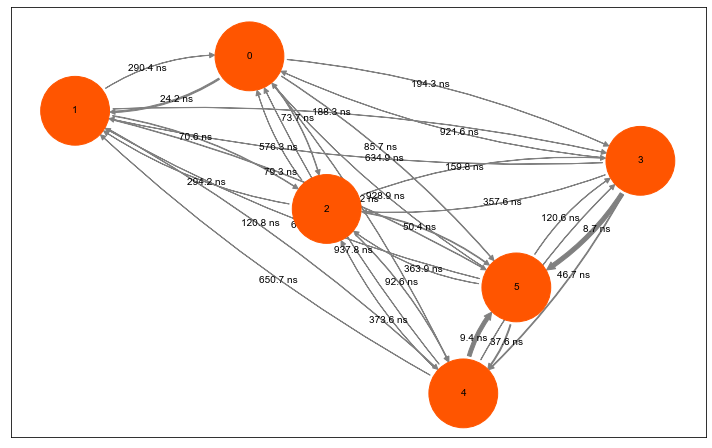

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))

# _, _, misc = pyemma.plots.plot_state_map(
#     *Y_concat[:, :2].T, metastable_traj, ax=ax, zorder=-1, nbins=150, alpha=0.5)
# misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.1f ns',
    arrow_labels=mfpt/10,
    size=10,
    show_frame=True,
    ax=ax)

# ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
# ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set(xlim=(1.5,3.6) , ylim=(2, 3.3))
# ax.set_xticks(np.arange(1, 4, 0.5))
# ax.set_yticks(np.arange(1, 4, 0.5))
ax.set_aspect('equal')

fig.tight_layout()

In [ ]:
_, _, misc = pyemma.plots.plot_state_map(
    *Y_concat[:, :2].T, metastable_traj, ax=axes[0], zorder=-1, nbins=150)

misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, ax=axes[1],
    weights=np.concatenate(msm.trajectory_weights()),
    nbins=150, #cmap=sns_cmap,
    kT=0.5825, legacy=False, alpha=1,
#     vmin=0.0, vmax=5.0, levels=100,
    cbar_label="Free energy (kcal/mol)"
)

axes[0].set_title('Metastable states', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')

axes[0].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[0].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[0].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[0].set_xticks(np.arange(0, 5, 0.5))
axes[0].set_yticks(np.arange(0, 5, 0.5))

axes[1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1].set_ylabel(r'RMSD to open crystal structure ($\AA$)')
axes[1].set(xlim=(0,4.5) , ylim=(0, 4.5))
axes[1].set_xticks(np.arange(0, 5, 0.5))
axes[1].set_yticks(np.arange(0, 5, 0.5))


axes[0].set_aspect('equal')

### Position metastable samples 

In [275]:
indir_sample = './rep_struct_with_IPA_1'
traj_list_sample = sorted(glob(indir_sample+'/*.pdb'))
traj_list_sample

['./rep_struct_with_IPA_1/all.pdb']

In [276]:
results_open_sample=[]
results_closed_sample=[]
for t in traj_list_sample:
    traj=pt.load(t, topfile, stride=1)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_sample.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_sample.append(rmsd_open)

In [277]:
rmsd_open_sample=np.concatenate(results_open_sample, axis=0)
rmsd_closed_sample=np.concatenate(results_closed_sample, axis=0)

In [278]:
results_open_sample

[array([1.66251973, 1.84712175, 1.76548683, ..., 1.84966083, 2.11089998,
        1.86020477])]

In [283]:
def plot_labels(ax=None):
    for i in range(0,len(rmsd_open_sample)):
        plt.text(rmsd_closed_sample[i]+0.02, rmsd_open_sample[i]+0.02, 
                 i, fontsize=12, color='white')

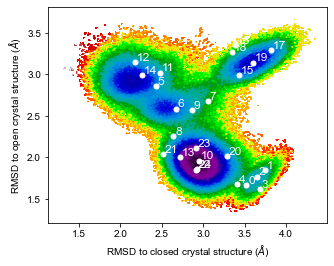

In [284]:
fig, ax = plt.subplots(figsize=(5, 5))

pyemma.plots.plot_free_energy(
    *Y_concat[:, :2].T, 
    weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, nbins=200,
    kT=0.5825, 
    cbar=False
)

ax.plot(rmsd_closed_sample, rmsd_open_sample, linewidth=0, marker='o', markersize=5, color='white')
plot_labels(ax=ax)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
# ax.set(xlim=(0,4.5) , ylim=(0, 4.5))
# ax.set_xticks(np.arange(0, 5, 0.5))
# ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_aspect('equal')


# ax.scatter(x=0.0, y=3.1458, s=20, c="midnightblue", marker="s")
# ax.scatter(x=3.1458, y=0.0, s=20, c="midnightblue", marker="s")
# ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
# ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

## Tentative HMM

In [41]:
hmm = pyemma.msm.estimate_hidden_markov_model(cluster.dtrajs, nstates, msm.lag)

KeyboardInterrupt: 

In [42]:
its2 = pyemma.msm.timescales_hmsm(cluster.dtrajs, nstates, lags=1000, nsamples=50, errors=None)

KeyboardInterrupt: 

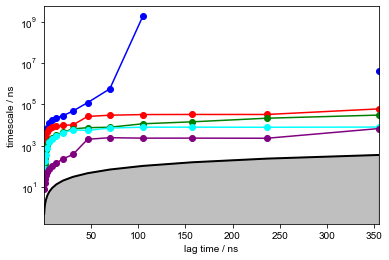

In [87]:

pyemma.plots.plot_implied_timescales(its2, marker='o', ylog=True, units='ns', dt=0.5);


In [ ]:
pyemma.msm.timescales_hmsm(
        cluster.dtrajs, 20, lags=450, errors=None, nsamples=50)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
pyemma.plots.plot_implied_timescales(,
    ax=ax, units='ns', dt=0.1, ylog=True)